In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_excel('web_scrapped_josaa(2016)R6.xlsx')

In [4]:
df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,NaN,5456.0,7066.0
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,NaN,1941.0,2487.0
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,NaN,663.0,1178.0
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,ST,NaN,357.0,416.0
4,Indian Institute of Technology Bhubaneswar,Civil Engineering and M. Tech. in Structural E...,AI,OPEN,NaN,5408.0,7295.0


In [5]:
df.drop(['Quota','Gender'], axis=1, inplace=True)

In [6]:
new_cols = ['inst','prog','cat','OR','CR']
df.columns = new_cols

In [7]:
df['inst'] = df['inst'].str.replace('Indian Institute  of Technology','IIT')
df['inst'] = df['inst'].str.replace('National Institute of Technology','NIT')
df['inst'] = df['inst'].str.replace('Indian Institute of Information Technology','IIIT')

In [8]:
df[['OR','CR']] = np.floor(df[['OR','CR']] ).astype('Int64')

In [9]:
df.head()

,inst,prog,cat,OR,CR
0,IIT Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",OPEN,5456,7066
1,IIT Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",OBC-NCL,1941,2487
2,IIT Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",SC,663,1178
3,IIT Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",ST,357,416
4,IIT Bhubaneswar,Civil Engineering and M. Tech. in Structural E...,OPEN,5408,7295


In [10]:
df.shape

(4106, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   inst    4106 non-null   object
 1   prog    4106 non-null   object
 2   cat     4106 non-null   object
 3   OR      4105 non-null   Int64 
 4   CR      4105 non-null   Int64 
dtypes: Int64(2), object(3)
memory usage: 168.5+ KB


In [12]:
df2 = df[df['cat']=='OPEN']

In [13]:
top_10_branches = df2[df2['CR']<500].sort_values(by='CR').head(10)

print(top_10_branches)

              inst                                               prog   cat  \
69      IIT Bombay  Computer Science and Engineering (4 Years, Bac...  OPEN   
173      IIT Delhi  Computer Science and Engineering (4 Years, Bac...  OPEN   
581     IIT Madras  Computer Science and Engineering (4 Years, Bac...  OPEN   
178      IIT Delhi  Computer Science and Engineering (5 Years, Bac...  OPEN   
75      IIT Bombay  Electrical Engineering (4 Years, Bachelor of T...  OPEN   
498     IIT Kanpur  Computer Science and Engineering (4 Years, Bac...  OPEN   
586     IIT Madras  Computer Science and Engineering (5 Years, Bac...  OPEN   
305  IIT Kharagpur  Computer Science and Engineering (4 Years, Bac...  OPEN   
311  IIT Kharagpur  Computer Science and Engineering (5 Years, Bac...  OPEN   
197      IIT Delhi  Mathematics and Computing (4 Years, Bachelor o...  OPEN   

      OR   CR  
69     1   60  
173   24  115  
581   62  173  
178  124  186  
75    22  227  
498  113  230  
586  214  278  
30

In [14]:
df3 = df2[df2['prog'] == 'Computer Science and Engineering (4 Years, Bachelor of Technology)'].sort_values(by='CR').head(10)

In [15]:
print(df3)

                      inst                                               prog  \
69              IIT Bombay  Computer Science and Engineering (4 Years, Bac...   
173              IIT Delhi  Computer Science and Engineering (4 Years, Bac...   
581             IIT Madras  Computer Science and Engineering (4 Years, Bac...   
498             IIT Kanpur  Computer Science and Engineering (4 Years, Bac...   
305          IIT Kharagpur  Computer Science and Engineering (4 Years, Bac...   
718            IIT Roorkee  Computer Science and Engineering (4 Years, Bac...   
3051  NIT, Tiruchirappalli  Computer Science and Engineering (4 Years, Bac...   
1000          IIT Guwahati  Computer Science and Engineering (4 Years, Bac...   
903     IIT (BHU) Varanasi  Computer Science and Engineering (4 Years, Bac...   
432          IIT Hyderabad  Computer Science and Engineering (4 Years, Bac...   

       cat   OR   CR  
69    OPEN    1   60  
173   OPEN   24  115  
581   OPEN   62  173  
498   OPEN  113 

Text(0.5, 1.0, 'Top 10 Institutes for CS Program by CR')

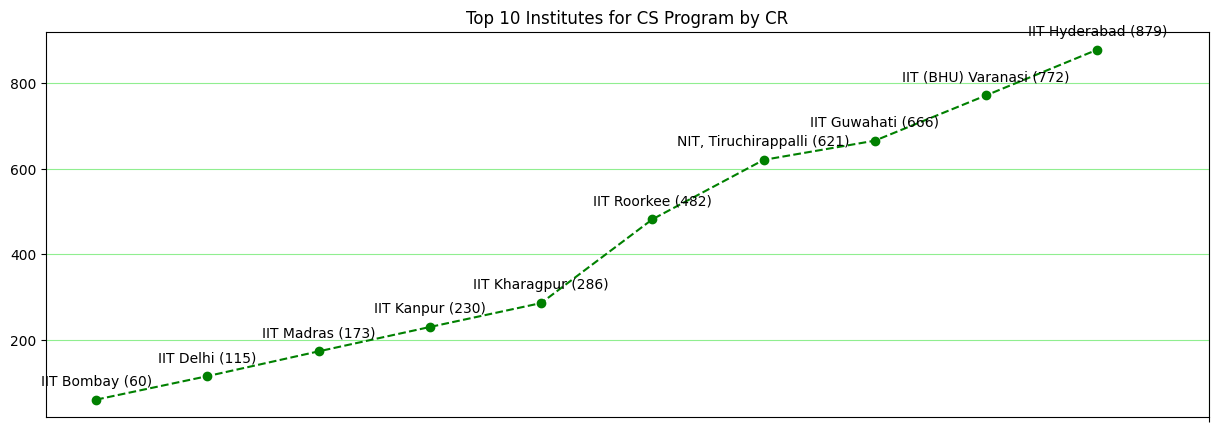

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(df3['inst'],df3['CR'],'go--')

for i, (inst, cr) in enumerate(zip(df3['inst'], df3['CR'])):
    plt.annotate(f'{inst} ({cr})',
                 (inst, cr),
                 textcoords="offset points",
                 xytext=(0,10),       
                 ha='center') 
plt.xticks('')
plt.grid(color = 'lightgreen')
plt.title('Top 10 Institutes for CS Program by CR')

In [23]:
inst_list=df3['inst'].tolist()
cr_list=df3['CR'].tolist()
print(inst_list)
print(cr_list)

['IIT Bombay', 'IIT Delhi', 'IIT Madras', 'IIT Kanpur', 'IIT Kharagpur', 'IIT Roorkee', 'NIT, Tiruchirappalli', 'IIT Guwahati', 'IIT (BHU) Varanasi', 'IIT Hyderabad']
[60, 115, 173, 230, 286, 482, 621, 666, 772, 879]


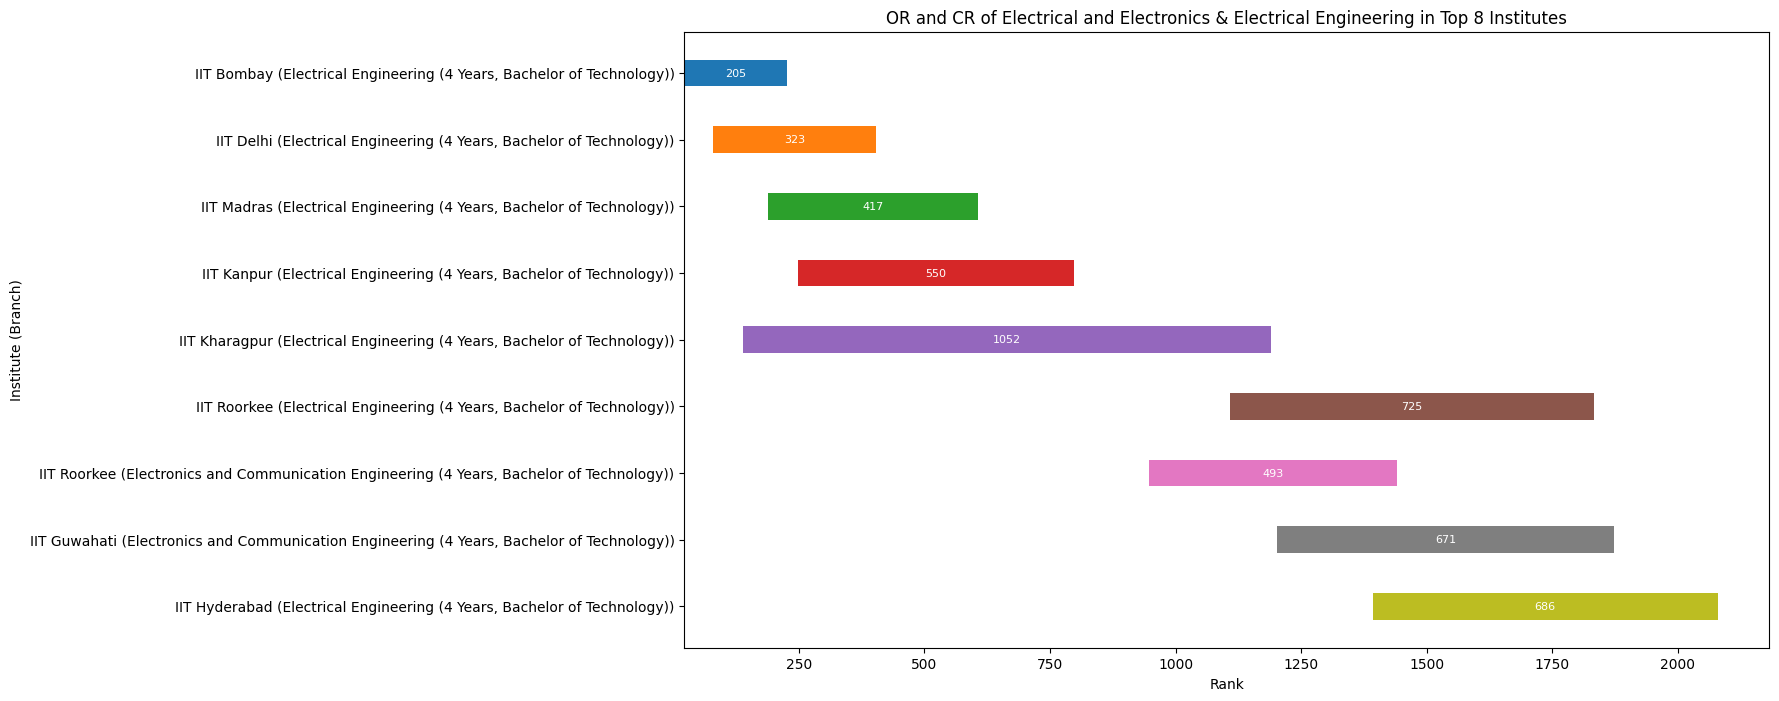

In [18]:
# Define the branches
branches = [
    'Electrical Engineering (4 Years, Bachelor of Technology)',
    'Electronics and Communication Engineering (4 Years, Bachelor of Technology)'
]

# Filter the DataFrame for the specific branches
df_branches = df2[df2['prog'].isin(branches)]

# Initialize a DataFrame to store top institutes for each branch
top_institutes_df = pd.DataFrame()

# Find the top institutes by median Closing Rank (CR) for each branch
for branch in branches:
    df_branch = df_branches[df_branches['prog'] == branch]
    top_institutes_cr = df_branch.groupby('inst')['CR'].median().nsmallest(8).index
    top_institutes_df = pd.concat([top_institutes_df, df_branch[df_branch['inst'].isin(top_institutes_cr)]])

# Remove duplicates (in case some institutes appear in the top 8 for both branches)
top_institutes_df = top_institutes_df.drop_duplicates(subset=['inst', 'prog'])

# Sort the DataFrame by median CR of the institutes
top_institutes_df = top_institutes_df.set_index('inst')
top_institutes_df = top_institutes_df.loc[top_institutes_df.groupby('inst')['CR'].median().sort_values().index].reset_index()

# Filter to get only the top 8 unique institutes by CR across both branches
unique_institutes = top_institutes_df['inst'].unique()[:8]
df_top = top_institutes_df[top_institutes_df['inst'].isin(unique_institutes)]

plt.figure(figsize=(14, 8))

for i, inst in enumerate(df_top['inst'].unique()):
    subset = df_top[df_top['inst'] == inst]
    for prog in subset['prog'].unique():
        prog_subset = subset[subset['prog'] == prog]
        bar_width = prog_subset['CR'].max() - prog_subset['OR'].min()
        bar_left = prog_subset['OR'].min()
        bar_label = bar_width
        
        plt.barh(f"{inst} ({prog})", bar_width, left=bar_left, height=0.4, align='center')
        plt.text(bar_left + bar_width / 2, f"{inst} ({prog})", bar_label, ha='center', va='center', color='white', fontsize=8)

plt.xlabel('Rank')
plt.ylabel('Institute (Branch)')
plt.title('OR and CR of Electrical and Electronics & Electrical Engineering in Top 8 Institutes')
plt.gca().invert_yaxis()
plt.show()
